In [74]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [135]:

# AB+ | A-
data = np.array([(0,0,0)]* 5 + [(1,1,1)] * 5 +[(1,0,0)] * 5)
# AB+ | B+
data = np.array([(0,0,0)]* 5 + [(1,1,1)] * 5 +[(0,1,1)] * 5)
# A+ | AB+
data = np.array([(0,0,0)]* 5 + [(1,0,1)] * 5 +[(1,1,1)] * 5)

# 0+ | A+ 
#data = np.array([(0,0,1)]* 5 + [(1,0,1)] * 5 )


In [136]:
# a--> b <--> non-a ou b

In [137]:
# Création de l'échantillon des valeurs
x = np.linspace(0, 1, 1000)

In [138]:
def simple_competition(data, alpha=10):
    plt.figure(figsize=(30,20))
    # H0 : C 
    H0 = ((0,0,1), (0,1,1), (1,0,1), (1,1,1))
    # H1 : A => C : non-A ou C
    H1 = ((0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,1), (1,1,1)) 
    # H2 : B => C : non B ou C
    H2 = ((0,0,0), (0,0,1), (1,0,0), (1,0,1), (0,1,1), (1,1,1)) 
    beta_ = {'H0':[1,1], 'H1':[1,1], 'H2':[1,1]}
    count = {'H0':0, 'H1':0, 'H2':0}
    mem_choice = []
    lik = {}
    dir = {}
    for i, obs in enumerate(data):
        n = i + 1
        ax = plt.subplot(5,5,i+1)
        lik['H0'] = int(tuple(obs) in H0)
        lik['H1'] = int(tuple(obs) in H1)
        lik['H2'] = int(tuple(obs) in H2)
        #print(lik['H0'], lik['H1'], lik['H2'])
        dir['H0'] = (count['H0']+ alpha/3) / (n + alpha)
        dir['H1'] = (count['H1']+ alpha/3) / (n + alpha)
        dir['H2'] = (count['H2']+ alpha/3) / (n + alpha)
        z = lik['H0'] * dir['H0'] + lik['H1'] * dir['H1'] +  lik['H2'] * dir['H2']
        p = ((lik['H0'] * dir['H0']) / z,
             (lik['H1'] * dir['H1']) / z,
             (lik['H2'] * dir['H2']) / z)
        choice = np.random.choice(['H0','H1','H2'], p=p)
        count[choice] += 1
        print(p, choice)
        beta_['H0'][int(choice=='H0')] += 1
        beta_['H1'][int(choice=='H1')] += 1
        beta_['H2'][int(choice=='H2')] += 1
        print(beta_)
        pdf_H0 = beta.pdf(x, beta_['H0'][1], beta_['H0'][0])
        pdf_H1 = beta.pdf(x, beta_['H1'][1], beta_['H1'][0])
        pdf_H2 = beta.pdf(x, beta_['H2'][1], beta_['H2'][0])
        ax.plot(x, pdf_H0, label=r'H0: $C$', color='tab:orange')
        ax.plot(x, pdf_H1, label=r'H1: $A \rightarrow C$', color='tab:blue')
        ax.plot(x, pdf_H2, label=r'H2: $B \rightarrow C$', color='tab:green')
        #overlap_surface = np.minimum(pdf_H0, pdf_H1)
        #overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
        #ax.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
        ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
        ax.text(0.05,4.5,f'A={obs[0]}')
        ax.text(0.05,4.1,f'B={obs[1]}')
        ax.text(0.05,3.7,f'C={obs[2]}')
        ax.text(0.05,3.3,f'Choice={choice}')
        ax.set_ylim(0,5)
        ax.set_xlim(0,1)
        plt.legend(loc=1)
    return beta_, count

In [139]:
def simple_competition_equiv(data, alpha=10):
    plt.figure(figsize=(30,20))
    # H0 : non A et non B <=> C 
    H0 = ((0,0,1), (1,0,0), (0,1,0), (1,1,0))
    # H1 : A <=> C : non-A ou C
    H1 = ((0,0,0), (0,1,0),  (1,0,1), (1,1,1)) 
    # H2 : B <=> C : non B ou C
    H2 = ((0,0,0), (1,0,0),  (0,1,1), (1,1,1)) 
    beta_ = {'H0':[1,1], 'H1':[1,1], 'H2':[1,1]}
    count = {'H0':0, 'H1':0, 'H2':0}
    mem_choice = []
    lik = {}
    dir = {}
    for i, obs in enumerate(data):
        n = i + 1
        ax = plt.subplot(5,5,i+1)
        lik['H0'] = int(tuple(obs) in H0)
        lik['H1'] = int(tuple(obs) in H1)
        lik['H2'] = int(tuple(obs) in H2)
        #print(lik['H0'], lik['H1'], lik['H2'])
        dir['H0'] = (count['H0']+ alpha/3) / (n + alpha)
        dir['H1'] = (count['H1']+ alpha/3) / (n + alpha)
        dir['H2'] = (count['H2']+ alpha/3) / (n + alpha)
        z = lik['H0'] * dir['H0'] + lik['H1'] * dir['H1'] +  lik['H2'] * dir['H2']
        p = ((lik['H0'] * dir['H0']) / z,
             (lik['H1'] * dir['H1']) / z,
             (lik['H2'] * dir['H2']) / z)
        choice = np.random.choice(['H0','H1','H2'], p=p)
        count[choice] += 1
        print(p, choice)
        beta_['H0'][int(choice=='H0')] += 1
        beta_['H1'][int(choice=='H1')] += 1
        beta_['H2'][int(choice=='H2')] += 1
        print(beta_)
        pdf_H0 = beta.pdf(x, beta_['H0'][1], beta_['H0'][0])
        pdf_H1 = beta.pdf(x, beta_['H1'][1], beta_['H1'][0])
        pdf_H2 = beta.pdf(x, beta_['H2'][1], beta_['H2'][0])
        ax.plot(x, pdf_H0, label=r'H0: $C$', color='tab:orange')
        ax.plot(x, pdf_H1, label=r'H1: $A \leftrightarrow C$', color='tab:blue')
        ax.plot(x, pdf_H2, label=r'H2: $B \leftrightarrow C$', color='tab:green')
        #overlap_surface = np.minimum(pdf_H0, pdf_H1)
        #overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
        #ax.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
        ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
        ax.text(0.05,4.5,f'A={obs[0]}')
        ax.text(0.05,4.1,f'B={obs[1]}')
        ax.text(0.05,3.7,f'C={obs[2]}')
        ax.text(0.05,3.3,f'Choice={choice}')
        ax.set_ylim(0,5)
        ax.set_xlim(0,1)
        plt.legend(loc=1)
    return beta_, count

(0.0, 0.5, 0.5) H2
{'H0': [2, 1], 'H1': [2, 1], 'H2': [1, 2]}
(0.0, 0.43478260869565216, 0.5652173913043479) H1
{'H0': [3, 1], 'H1': [2, 2], 'H2': [2, 2]}
(0.0, 0.5, 0.5) H2
{'H0': [4, 1], 'H1': [3, 2], 'H2': [2, 3]}
(0.0, 0.4482758620689655, 0.5517241379310345) H1
{'H0': [5, 1], 'H1': [3, 3], 'H2': [3, 3]}
(0.0, 0.5, 0.5) H1
{'H0': [6, 1], 'H1': [3, 4], 'H2': [4, 3]}
(0.0, 1.0, 0.0) H1
{'H0': [7, 1], 'H1': [3, 5], 'H2': [5, 3]}
(0.0, 1.0, 0.0) H1
{'H0': [8, 1], 'H1': [3, 6], 'H2': [6, 3]}
(0.0, 1.0, 0.0) H1
{'H0': [9, 1], 'H1': [3, 7], 'H2': [7, 3]}
(0.0, 1.0, 0.0) H1
{'H0': [10, 1], 'H1': [3, 8], 'H2': [8, 3]}
(0.0, 1.0, 0.0) H1
{'H0': [11, 1], 'H1': [3, 9], 'H2': [9, 3]}
(0.0, 0.68, 0.32) H1
{'H0': [12, 1], 'H1': [3, 10], 'H2': [10, 3]}
(0.0, 0.6981132075471699, 0.30188679245283023) H2
{'H0': [13, 1], 'H1': [4, 10], 'H2': [10, 4]}
(0.0, 0.6607142857142857, 0.33928571428571425) H1
{'H0': [14, 1], 'H1': [4, 11], 'H2': [11, 4]}
(0.0, 0.6779661016949153, 0.3220338983050848) H2
{'H0': [1

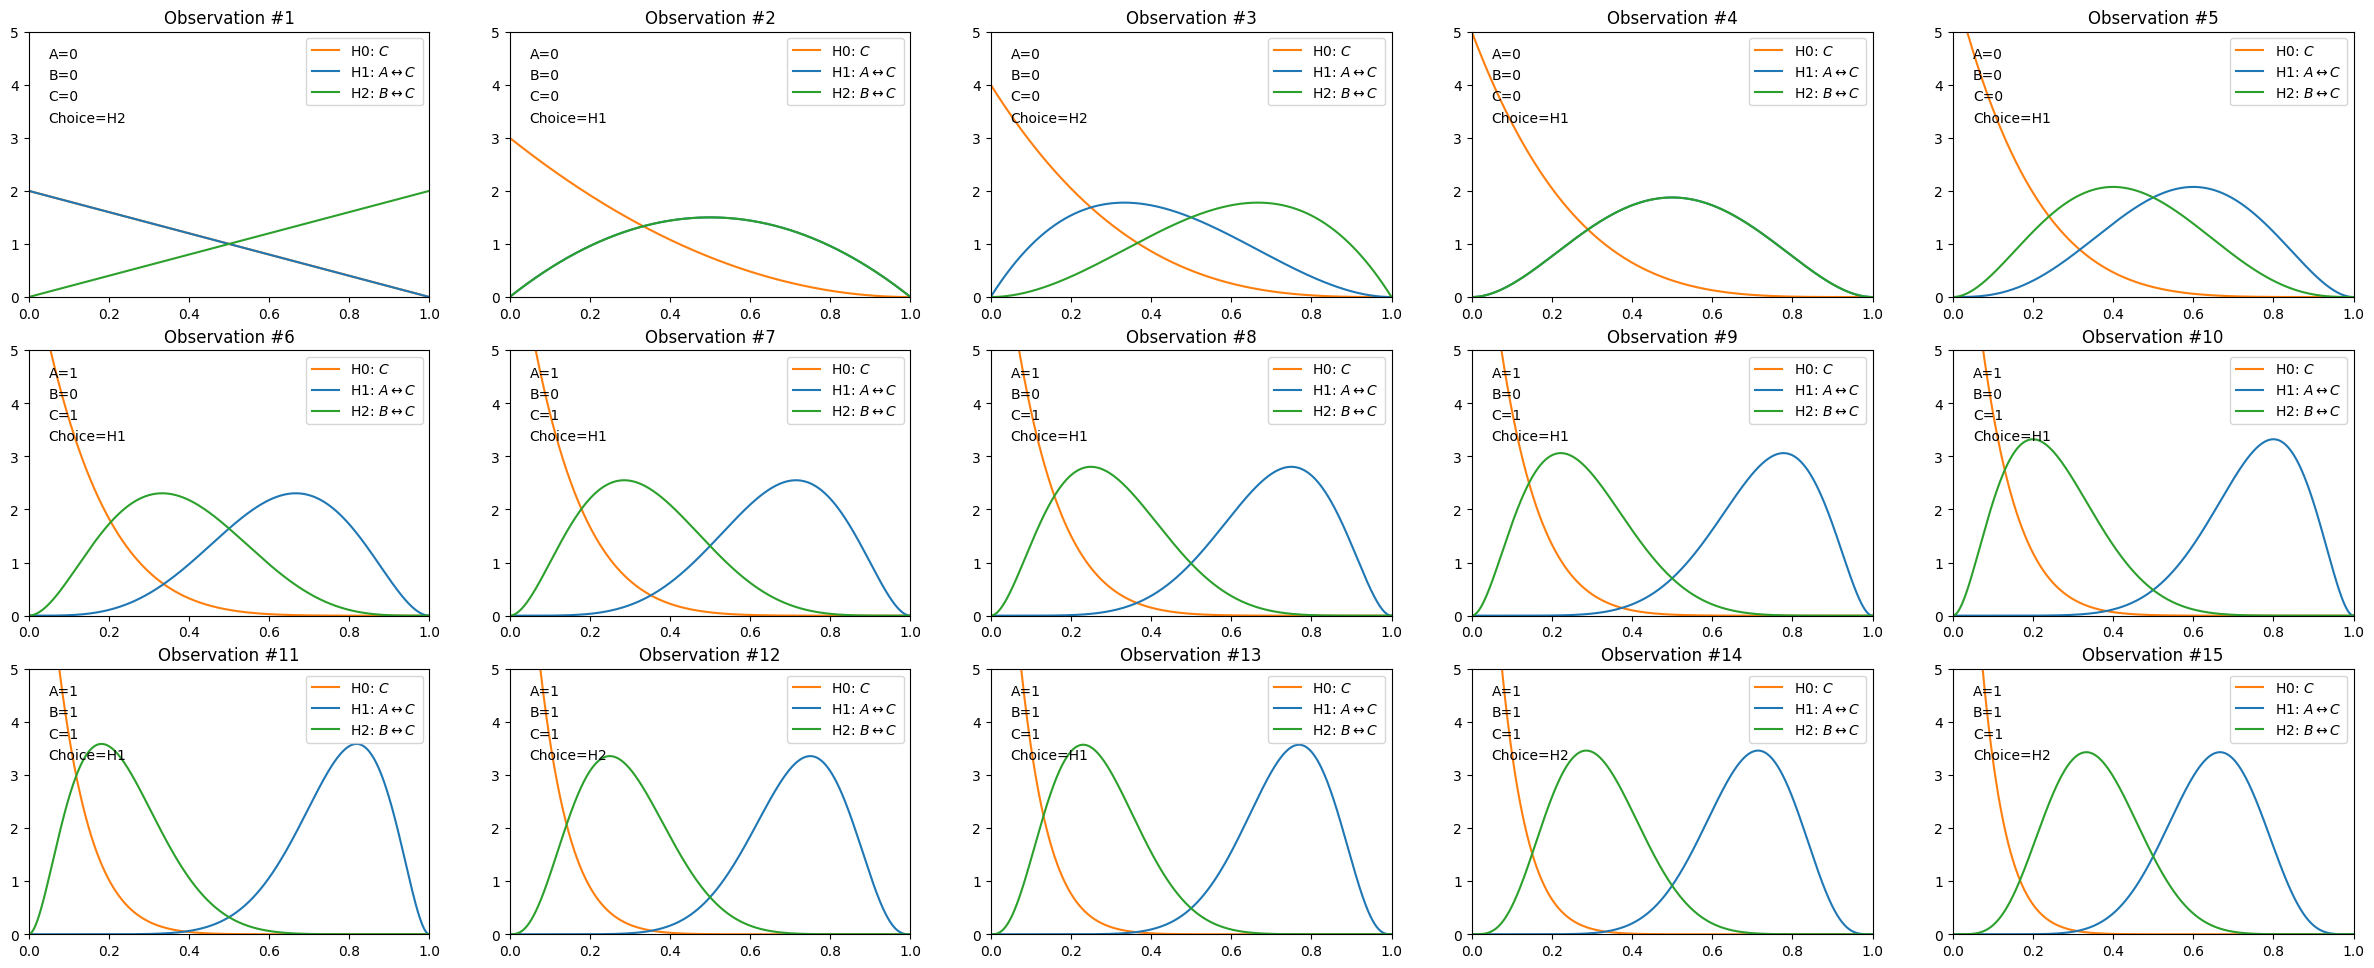

In [140]:
beta_, count = simple_competition_equiv(data)

In [141]:
beta_

{'H0': [16, 1], 'H1': [6, 11], 'H2': [11, 6]}

In [142]:
p = [0.2,0.3,0.5]

In [143]:
beta_['H0'][0], beta_['H0'][1]

(16, 1)

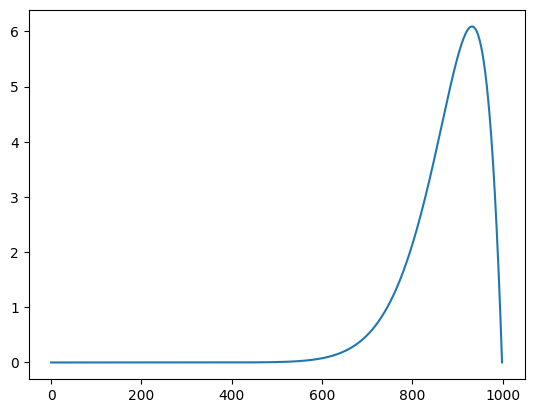

In [144]:
plt.plot(pdf_H0)

In [90]:
x

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407